In [1]:
import requests
import pandas as pd
from sqlalchemy import create_engine
import statsmodels.api as sm
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [19]:
engine = create_engine('sqlite:///wine_quality.db')
df = pd.read_sql_query("SELECT * FROM wine_quality", engine)
# df.info()
# df.shape

In [4]:
df['intercept'] = 1
df.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,intercept
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Hypothesis

We are trying to determine what makes quality red wine. We went with looking at determining if pH has any influence on quality wine.

<Axes: xlabel='quality', ylabel='pH'>

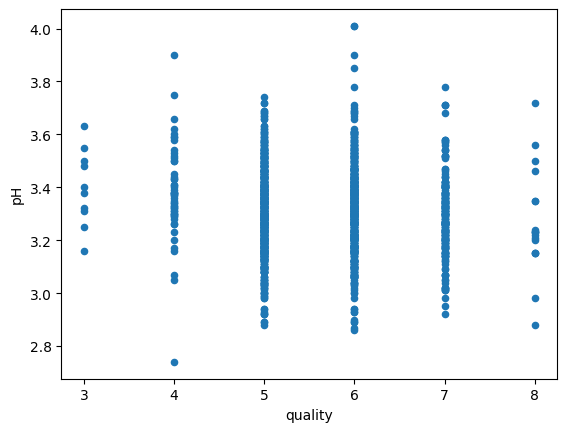

In [20]:
# Establishing the graph

df.plot.scatter('quality', 'pH')
#plt.scatter(df['pH'], df['quality'])


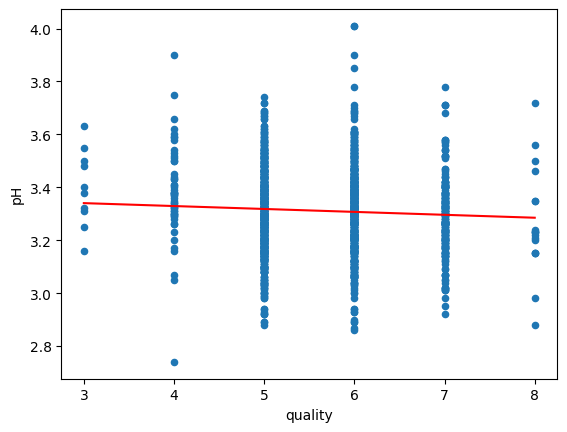

In [18]:
# Create scatter plot
ax = df.plot.scatter('quality', 'pH')

# Calculate line of best fit
x = df['quality']
y = df['pH']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Add line of best fit to plot
xp = np.linspace(x.min(), x.max(), 100)
ax.plot(xp, polynomial(xp), '-', color='red')

plt.show()

In [17]:
model = sm.OLS(df['quality'], df['pH'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          9.427e+04
Date:                Sun, 04 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:05:25   Log-Likelihood:                         -1776.7
No. Observations:                1599   AIC:                                      3555.
Df Residuals:                    1598   BIC:                                      3561.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.5389      0.002    307.038      0.000       0.535       0.542
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.332
Skew:                          -0.332   Prob(JB):                     8.24e-29
Kurtosis:                       4.225   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y = df['quality']
x = df.drop('quality', axis=1)

model = sm.OLS(y, x)
result = model.fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     74.91
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          3.76e-145
Time:                        16:57:09   Log-Likelihood:                -1567.6
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1586   BIC:                             3231.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
index                -6.851e-05   3.96e-05     -1.732      0.083      -0.000    9.07e-06
fixed acidity            0.0194      0.026      0.742      0.458      -0.032       0.071
volatile acidity        -1.0781      0.121     -8.905      0.000      -1.316      -0.841
citric acid             -0.1723      0.147     -1.171      0.242      -0.461       0.116
residual sugar           0.0172      0.015      1.146      0.252      -0.012       0.047
chlorides               -1.9084      0.419     -4.549      0.000      -2.731      -1.086
free sulfur dioxide      0.0052      0.002      2.339      0.019       0.001       0.010
total sulfur dioxide    -0.0036      0.001     -4.764      0.000      -0.005      -0.002
density                -20.2460     21.663     -0.935      0.350     -62.736      22.244
pH                      -0.4537      0.193     -2.352      0.019      -0.832      -0.075
sulphates                0.8989      0.115      7.836      0.000       0.674       1.124
alcohol                  0.2805      0.027     10.552      0.000       0.228       0.333
intercept               24.5188     21.232      1.155      0.248     -17.128      66.165
==============================================================================
Omnibus:                       26.395   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.649
Skew:                          -0.169   Prob(JB):                     4.05e-09
Kurtosis:                       3.682   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

Based on the OLS Regression Results, based on this data alone we can see that quality red wine has a moderate R-squared value which means there may be more undetermined factors that could influence what constitutes as quality wine.

Some other information we can extrapolate is that free sulfur dioxide, sulphates, and alcohol content have a positive correlation with quality. While volatile acidity, chlorides, total sulfur dixide, and pH have negative correlations.

Next time you wish to purchase a quality Red Wine, you may want to ask about sulphates, and the alcohol content in the wine.